# 🎯 Objetivo
Este notebook tem como objetivo complementar o nosso notebook principal, focando especificamente nas respostas às perguntas formuladas no início da Etapa 1. Optamos por estruturá-lo separadamente para garantir uma melhor organização e clareza na apresentação das conclusões.

## 📦 Instalação da Biblioteca `nbimporter`

Para importar variáveis, funções ou células de um notebook Jupyter para outro, utilizamos a biblioteca `nbimporter`. 

🔧 **Para instalá-la, execute o seguinte comando no terminal ou em uma célula do Jupyter:**

```bash
pip install nbimporter


In [1]:
import nbimporter
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


<a id="perguntas"></a>
# ❓ Perguntas e Respostas

A seguir, apresentamos cada pergunta acompanhada de sua resposta final, com base nas análises realizadas ao longo das Etapas 1 a 5 do projeto. Quando aplicável, também incluímos referências às etapas, gráficos, tabelas e demais visualizações que serviram de base para a resposta.

Algumas questões foram abordadas em diferentes momentos do projeto — nesses casos, consolidamos as evidências para oferecer uma visão mais completa.

<a id="1"></a>
### 1 - Existe correlação entre o PIB per capita de uma região e a taxa de mortalidade infantil?

#### Com base na análise comparativa entre a distribuição regional dos óbitos infantis e a do PIB per capita, é possível identificar uma correlação negativa entre essas duas variáveis. Os gráficos mostram que regiões com maior participação no PIB per capita, como o Sul, Sudeste e Centro-Oeste, concentram proporcionalmente menos óbitos infantis ao longo dos anos analisados. Em contrapartida, o Nordeste, que apresenta a menor fatia de participação no PIB per capita lidera na proporção de mortalidade infantil.


In [3]:

# 1. Preparação dos dados
df_obitos = pd.read_csv('dataFrame/BrStatsAtualizada.csv', sep=';', low_memory=False)
df_pib = pd.read_csv('pib_per_capita/pib_per_capita_regioes.csv')

# Converter dados numéricos
df_obitos['NrObitosInfantis'] = df_obitos['NrObitosInfantis'].astype(str).str.replace('.','').str.replace(',','.').astype(float)
df_obitos['Ano'] = df_obitos['Ano'].astype(str)
df_pib['Ano'] = df_pib['Ano'].astype(str)

# Agregar e juntar dados
df_agregado = df_obitos.groupby(['Ano', 'Regiao'])['NrObitosInfantis'].sum().reset_index()
df_final = pd.merge(df_agregado, df_pib, on=['Ano', 'Regiao'])

# 2. Criar gráfico de área percentual para Óbitos
fig_obitos = px.area(
    df_final,
    x='Ano',
    y='NrObitosInfantis',
    color='Regiao',
    title='<b>Distribuição Percentual dos Óbitos Infantis por Região</b>',
    labels={'NrObitosInfantis': 'Participação % nos Óbitos', 'Ano': 'Ano'},
    groupnorm='percent',  # Normaliza para 100%
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# 3. Criar gráfico de área percentual para PIB
fig_pib = px.area(
    df_final,
    x='Ano',
    y='PIB_per_capita',
    color='Regiao',
    title='<b>Distribuição Percentual do PIB per capita por Região</b>',
    labels={'PIB_per_capita': 'Participação % no PIB', 'Ano': 'Ano'},
    groupnorm='percent',  # Normaliza para 100%
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# 4. Ajustar layouts
for fig in [fig_obitos, fig_pib]:
    fig.update_layout(
        height=400,
        width=800,
        hovermode='x unified',
        yaxis=dict(ticksuffix='%'),
        legend=dict(orientation='h', yanchor='bottom', y=1.02),
        margin=dict(l=50, r=50, t=80, b=50)
    )
    fig.update_traces(
        hovertemplate='<b>%{color}</b><br>Ano: %{x}<br>Participação: %{y:.1f}%'
    )

# 5. Exibir gráficos lado a lado
from plotly.subplots import make_subplots

final_fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Distribuição dos Óbitos Infantis por Região',
    'Distribuição do PIB per capita por Região'
))

for trace in fig_obitos.data:
    final_fig.add_trace(trace, row=1, col=1)
    
for trace in fig_pib.data:
    final_fig.add_trace(trace, row=1, col=2)

final_fig.update_layout(
    height=450,
    width=1000,
    showlegend=True,
    title_text='<b>Comparação da Distribuição Regional: Óbitos vs PIB (2016-2021)</b>',
    title_x=0.5
)

final_fig.show()

#### Ademais, ao observar as regras de associação,a Regra 1 confirma a expectativa geral: regiões com PIB per capita alto tendem a apresentar mortalidade infantil baixa, o que é coerente tanto com a lógica socioeconômica quanto com a visualização dos gráficos, nos quais regiões como Sul, Sudeste e Centro-Oeste (com maior PIB) possuem menores proporções de óbitos. A confiança alta (86,01%) reforça a consistência dessa associação. No entanto, o lift inferior a 1 sugere que, embora exista relação, ela não é tão forte quanto se esperaria, o que indica que outros fatores podem estar atuando simultaneamente (como políticas públicas, estrutura de saúde e fatores demográficos).

#### As Regras 2 e 3, por outro lado, são contraintuitivas. Ambas mostram que, mesmo com PIB per capita baixo, a mortalidade infantil também tende a ser baixa, com destaque para a Regra 3, cuja confiança é altíssima (94,23%). Isso levanta uma hipótese importante: em determinadas regiões de menor PIB, mecanismos compensatórios — como programas sociais, atenção básica à saúde, saneamento mínimo ou iniciativas federais — podem estar sendo eficazes em manter baixos os índices de mortalidade infantil.

#### Do ponto de vista gráfico, essa hipótese é sustentada: o Nordeste, por exemplo, tem baixa participação no PIB per capita, mas ainda assim representa uma parte importante das regiões com mortalidade infantil relativamente controlada, sem grandes aumentos ao longo dos anos. Isso se alinha com a observação de que o PIB por si só não determina os resultados de saúde infantil, embora ajude a explicá-los em parte

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Carregar o arquivo
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";", low_memory=False)

# Converter colunas numéricas com vírgula para float
for col in ['PIB', 'Populacao', 'NrNascimentos', 'NrObitosInfantis']:
    df[col] = df[col].astype(str).str.replace(r'\.', '', regex=True).str.replace(',', '.').astype(float)

# Calcular o PIB per capita
df['PIB_per_capita'] = df['PIB'] / df['Populacao']

# Calcular a taxa de mortalidade infantil (óbitos por 1000 nascimentos)
df['TaxaMortalidadeInfantil'] = (df['NrObitosInfantis'] / df['NrNascimentos']) * 1000


# 📊 Classificar PIB per capita como 'Alto' ou 'Baixo'
media_pib_per_capita = df['PIB_per_capita'].mean()
df['PIB_per_capita_cat'] = df['PIB_per_capita'].apply(lambda x: 'Alto' if x > media_pib_per_capita else 'Baixo')

# 📊 Classificar mortalidade infantil como 'Alta' ou 'Baixa'
media_mortalidade = df['TaxaMortalidadeInfantil'].mean()
df['MortalidadeInfantil_cat'] = df['TaxaMortalidadeInfantil'].apply(lambda x: 'Alta' if x > media_mortalidade else 'Baixa')






# Criar DataFrame para Apriori com variáveis categóricas binárias
df_apriori = pd.get_dummies(df[['PIB_per_capita_cat', 'MortalidadeInfantil_cat']])
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Filtrar pela regra: Se PIB_per_capita_Alto então MortalidadeInfantil_Baixa
regras_filtradas = rules[
    (rules['antecedents'].astype(str).str.contains('PIB_per_capita_cat_Alto')) &
    (rules['consequents'].astype(str).str.contains('MortalidadeInfantil_cat_Baixa'))
]
for index, row in rules.iterrows():
    print(f"Regra {index + 1}: {row['antecedents']} => {row['consequents']}")
    print(f"Suporte: {row['support']:.4f}, Confiança: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    print('-' * 80)


Regra 1: frozenset({'PIB_per_capita_cat_Alto'}) => frozenset({'MortalidadeInfantil_cat_Baixa'})
Suporte: 0.2822, Confiança: 0.8601, Lift: 0.9396
--------------------------------------------------------------------------------
Regra 2: frozenset({'PIB_per_capita_cat_Baixo'}) => frozenset({'MortalidadeInfantil_cat_Baixa'})
Suporte: 0.6332, Confiança: 0.9423, Lift: 1.0295
--------------------------------------------------------------------------------
Regra 3: frozenset({'MortalidadeInfantil_cat_Baixa'}) => frozenset({'PIB_per_capita_cat_Baixo'})
Suporte: 0.6332, Confiança: 0.6917, Lift: 1.0295
--------------------------------------------------------------------------------


#### Portanto, sim, há uma correlação entre PIB per capita e mortalidade infantil, mas ela não é direta nem uniforme. A Regra 1 mostra uma tendência esperada (PIB alto → mortalidade baixa), mas o lift fraco e os resultados de Regras 2 e 3 revelam que fatores estruturais e políticas públicas podem estar quebrando a lógica clássica da desigualdade econômica em algumas regiões. Isso reforça a ideia de que a redução da mortalidade infantil não depende apenas do crescimento econômico, mas de como os recursos são aplicados e das políticas adotadas para garantir equidade no acesso à saúde.

<a id="2"></a>
### 2 - Regiões com maior produção agrícola têm maior PIB per capita?

#### Não, necessariamente. Embora algumas regiões com alta produção agrícola também tenham PIB per capita elevado, isso não é uma regra geral. A análise mostra que a produção agrícola por si só não garante maior desenvolvimento econômico. O que realmente faz diferença é a capacidade de agregar valor à produção, por meio de industrialização, logística eficiente e diversificação econômica.

In [4]:

df_agricola = pd.read_csv('dataFrame/BrStatsAtualizada.csv', sep=';', low_memory=False)
df_pib_regioes = pd.read_csv('pib_per_capita/pib_per_capita_regioes.csv')  # Dados já agregados por região

# Converter colunas numéricas (tratando formato brasileiro)
if 'VlProducaoAgricola' in df_agricola.columns:
    df_agricola['VlProducaoAgricola'] = df_agricola['VlProducaoAgricola'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Agregar produção agrícola por região e ano (soma)
df_agregado_regiao = df_agricola.groupby(['Ano', 'Regiao'])['VlProducaoAgricola'].sum().reset_index()

# Contar número de municípios por região/ano (para o tamanho dos pontos)
qtd_municipios = df_agricola.groupby(['Ano', 'Regiao'])['Municipio'].nunique().reset_index()
qtd_municipios.rename(columns={'Municipio': 'QtdMunicipios'}, inplace=True)

# Juntar todos os dados (usando a tabela de PIB por regiões)
df_final = pd.merge(df_agregado_regiao, df_pib_regioes, on=['Ano', 'Regiao'])
df_final = pd.merge(df_final, qtd_municipios, on=['Ano', 'Regiao'])

# Converter Ano para string para a animação
df_final['Ano'] = df_final['Ano'].astype(str)

# Criar o gráfico
fig = px.scatter(
    df_final,
    x='PIB_per_capita',  # Coluna da sua tabela de regiões
    y='VlProducaoAgricola',
    color='Regiao',
    size='QtdMunicipios',
    animation_frame='Ano',
    range_x=[0, df_final['PIB_per_capita'].max() * 1.1],
    range_y=[0, df_final['VlProducaoAgricola'].max() * 1.1],
    title='<b>Relação entre PIB per capita e Produção Agrícola por Região (2016-2021)</b>',
    labels={
        'PIB_per_capita': 'PIB per capita (R$)',
        'VlProducaoAgricola': 'Valor da Produção Agrícola (R$)',
        'QtdMunicipios': 'Nº de Municípios',
        'Regiao': 'Região'
    },
    hover_data=['Regiao', 'Ano'],
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    font=dict(family="Arial", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    legend_title_text='Região',
    margin=dict(l=40, r=40, t=80, b=40),
    yaxis=dict(gridcolor='lightgrey'),
    xaxis=dict(gridcolor='lightgrey'),
    hovermode='closest'
)

fig.update_traces(
    marker=dict(opacity=0.85, line=dict(width=1, color='DarkSlateGrey'))
)

# Configurações da animação
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig.show()

<a id="3"></a>
### 3 - Cidades com maior área cultivada têm menor densidade populacional?
#### Sim. A análise mostra que regiões com maior área cultivada, como o Centro-Oeste, tendem a ter baixa densidade populacional, indicando que a agricultura extensiva ocorre, predominantemente, em áreas menos urbanizadas. Por outro lado, regiões mais populosas, como o Sudeste, apresentam menor área plantada, reforçando o padrão inverso: alta densidade, pouca terra cultivada. Essa relação não é absoluta, mas o gráfico evidencia uma tendência clara de que áreas com grande atividade agrícola têm, em média, menos pessoas por quilômetro quadrado, refletindo os modelos de uso do solo e ocupação territorial no Brasil.

In [5]:
# 1. Carregar os dados
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=';', low_memory=False)

# 2. Tratar colunas numéricas
df['Populacao'] = df['Populacao'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Area'] = df['Area'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# 3. Calcular densidade populacional
df['DensidadePopulacional'] = df['Populacao'] / df['Area']

# 4. Agregar por região
df_regiao = df.groupby('Regiao').agg({
    'AreaPlantada_h': 'sum',
    'Populacao': 'sum',
    'Area': 'sum'
}).reset_index()

# Recalcular densidade populacional
df_regiao['DensidadePopulacional'] = df_regiao['Populacao'] / df_regiao['Area']
df_regiao = df_regiao.sort_values(by='AreaPlantada_h', ascending=False)

# 5. Criar gradientes de cor
# Gradiente verde (escuro → claro) para Área Plantada
cores_area = ['#bae4b3','#74c476','#31a354','#006d2c']  # Tons de verde
# Gradiente amarelo (escuro → claro) para Densidade
cores_densidade = ['#ffeda0', '#fed976', '#feb24c', '#fd8d3c']  # Tons de amarelo/laranja

# 6. Criar gráfico de barras agrupadas
fig = go.Figure()

# Área Plantada (eixo Y esquerdo) - Gradiente verde
fig.add_trace(go.Bar(
    x=df_regiao['Regiao'],
    y=df_regiao['AreaPlantada_h'],
    name='Área Plantada (ha)',
    marker=dict(
        color=df_regiao['AreaPlantada_h'],
        colorscale=cores_area,
        colorbar=dict(title='Área (ha)', x=-0.15),
        cmin=df_regiao['AreaPlantada_h'].min(),
        cmax=df_regiao['AreaPlantada_h'].max()
    ),
    yaxis='y1',
    offsetgroup=1
))

# Densidade Populacional (eixo Y direito) - Gradiente amarelo
fig.add_trace(go.Bar(
    x=df_regiao['Regiao'],
    y=df_regiao['DensidadePopulacional'],
    name='Densidade Populacional (hab/km²)',
    marker=dict(
        color=df_regiao['DensidadePopulacional'],
        colorscale=cores_densidade,
        colorbar=dict(title='Densidade', x=1.15),
        cmin=df_regiao['DensidadePopulacional'].min(),
        cmax=df_regiao['DensidadePopulacional'].max()
    ),
    yaxis='y2',
    offsetgroup=2
))

# 7. Layout com barras lado a lado
fig.update_layout(
    title='Área Plantada x  Densidade Populacional por Região (2016–2021)',
    xaxis=dict(title='Região'),
    yaxis=dict(
        title=dict(text='Área Plantada (ha)', font=dict(color='#31a354')),
        tickfont=dict(color='#31a354'),
        side='left'
    ),
    yaxis2=dict(
        title=dict(text='Densidade Populacional (hab/km²)', font=dict(color='#feb24c')),
        tickfont=dict(color='#feb24c'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(x=0.02, y=0.98),
    template='simple_white',
    height=500,
    width=900,
    margin=dict(l=50, r=150)  # Margem maior para as colorbars
)

fig.show()

<a id="4"></a>
### 4 - Estados mais populosos têm mais empregos, mas piores indicadores de saúde?
#### O primeiro gráfico, que analisa densidade populacional versus número de empregos, mostra que estados mais densamente povoados tendem a ter mais empregos formais e informais, devido à urbanização e maior atividade econômica. O Distrito Federal é um destaque, com altíssimo número de empregos, sendo um outlier positivo.

In [13]:

# Carregar os dados
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";", low_memory=False)

# Converter colunas
for col in ["povoamento", "PessoalOcupado", "PessoalAssalariado"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "."), errors="coerce")

# Agrupar por estado (UF)
df_estado = df.groupby("UF")[["povoamento", "PessoalOcupado", "PessoalAssalariado"]].mean().reset_index()

# Ordenar pela densidade populacional
df_estado = df_estado.sort_values("povoamento")

# Criar gráfico de linhas
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_estado["povoamento"],
    y=df_estado["PessoalOcupado"],
    mode="lines+markers",
    name="Pessoal Ocupado",
    line=dict(color="royalblue"),
    hovertext=df_estado["UF"]
))

fig.add_trace(go.Scatter(
    x=df_estado["povoamento"],
    y=df_estado["PessoalAssalariado"],
    mode="lines+markers",
    name="Pessoal Assalariado",
    line=dict(color="seagreen"),
    hovertext=df_estado["UF"]
))

fig.update_layout(
    title="Densidade Populacional x Número de Empregos (Média por Estado)",
    xaxis_title="Densidade Populacional Média (hab/km²)",
    yaxis_title="Número Médio de Pessoas (escala log)",
    height=500,
    width=900,
    template="plotly_white",
    hovermode="x unified"
)

fig.update_yaxes(type='log')


fig.show()


#### O segundo gráfico, que compara densidade populacional com mortalidade infantil, indica que não há uma relação direta entre alta densidade e piores indicadores de saúde. Pelo contrário, estados mais urbanos, como DF e São Paulo, apresentam um nível contralado de  mortalidade infantil comparado a sua densidade, enquanto estados com menor densidade, como Maranhão e Amapá, apresentam índices piores.

In [11]:
# Carregar os dados
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";", low_memory=False)

# Converter colunas para valores numéricos
for col in ["povoamento", "NrObitosInfantis", "NrNascimentos"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "."), errors="coerce")

# Calcular Mortalidade Infantil
df["MortalidadeInfantil"] = (df["NrObitosInfantis"] / df["NrNascimentos"]) * 1000

# Agrupar por estado e calcular a média
df_estado = df.groupby("UF").agg({
    "povoamento": "mean",
    "MortalidadeInfantil": "mean"
}).reset_index()

# Ordenar os estados pelo nome (opcional)
df_estado.sort_values(by="UF", inplace=True)

# Criar gráfico de barras
fig = go.Figure(data=[
    go.Bar(name='Densidade Populacional Média', x=df_estado["UF"], y=df_estado["povoamento"], marker_color='indianred'),
    go.Bar(name='Mortalidade Infantil Média', x=df_estado["UF"], y=df_estado["MortalidadeInfantil"], marker_color='steelblue')
])

fig.update_layout(
    yaxis_type='log',
    yaxis_title='Valor (Escala Log)',
    title='Comparativo por Estado: Densidade Populacional x Mortalidade Infantil (Escala Logarítmica)',
    barmode='group',
    template='plotly_white',
    height=600
)


fig.show()


#### Portanto, não. Apesar de serem mais povoadas e economicamente ativas, as cidades com maior densidade não apresentam piores indicadores de saúde. Na verdade, muitas vezes possuem melhores resultados graças à infraestrutura e serviços públicos mais desenvolvidos.

<a id="5"></a>
### 5 - Estados com maior volume de exportações têm maior PIB per capita?
#### Não necessariamente. Com base na análise do gráfico de Exportações vs PIB per capita por Estado, é possível perceber que um maior volume de exportações não garante, por si só, um maior PIB per capita. O estado de São Paulo, por exemplo, apresenta um alto volume de exportações, mas não lidera o ranking de PIB per capita. Por outro lado, o Distrito Federal se destaca entre os estados com maior PIB per capita, mesmo com um volume exportador relativamente baixo, o que indica que sua economia está fortemente baseada em setores como administração pública e serviços. Esses exemplos mostram que o desenvolvimento econômico regional depende de múltiplos fatores além do comércio exterior. Entre eles, destacam-se a composição setorial da economia, o nível de diversificação produtiva, a infraestrutura institucional e a presença de políticas públicas que impactam diretamente o rendimento per capita da população.

🔍 Dica: Para visualizar o PIB per capita dos estados de SP e AM, clique na legenda da cor azul (Exportações) no gráfico. Isso ocultará temporariamente as barras de exportações e permitirá ver com mais clareza as barras de PIB per capita desses estados.

In [10]:
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";", dtype={"Exportacoes_R$": str})
df.columns = df.columns.str.strip()

# Carregar o dataset de PIB per capita por estado
df_pib_estado = pd.read_csv("pib_per_capita/pib_per_capita_estados.csv")
df_pib_estado["Ano"] = df_pib_estado["Ano"].astype(str)

for col in ["Exportacoes_R$", "QtEmpresas", "PessoalOcupado"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False),errors="coerce")
    
df["Ano"] = df["Ano"].astype(str)
df_exportacoes = df.groupby(["Ano", "UF"])["Exportacoes_R$"].sum().reset_index()
df_final = pd.merge(df_exportacoes, df_pib_estado, on=["Ano", "UF"])
fig = go.Figure()
anos = sorted(df_final["Ano"].unique())
buttons = []

for i, ano in enumerate(anos):
    df_ano = df_final[df_final["Ano"] == ano].sort_values("PIB_per_capita", ascending=False)
    
    fig.add_trace(go.Bar(
        x=df_ano["UF"],
        y=df_ano["Exportacoes_R$"],
        name="Exportações (R$)",
        marker_color="#1f77b4",
        yaxis="y2",
        visible=(i==0)
    ))

    fig.add_trace(go.Bar(
        x=df_ano["UF"],
        y=df_ano["PIB_per_capita"],
        name="PIB per capita (R$)",
        marker_color="#ff7f0e",
        visible=(i==0)
    ))

    buttons.append(dict(
        label=str(ano),
        method="update",
        args=[{"visible": [False]*len(anos)*2},
              {"title": f"Exportações vs PIB per capita por Estado - {ano}"}]
    ))
    buttons[-1]["args"][0]["visible"][i*2] = True
    buttons[-1]["args"][0]["visible"][i*2 + 1] = True

fig.update_layout(
    title="Exportações vs PIB per capita por Estado",
    xaxis=dict(title="Estados", tickangle=45),
    yaxis=dict(title="PIB per capita (R$)", side="left"),
    yaxis2=dict(
        title="Exportações (R$)",
        overlaying="y",
        side="right"
        
    ),
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.0,
        "y": 1.15
    }],
    barmode="group",
    plot_bgcolor="white",
    height=600,
    width=1000,
    legend=dict(x=1.1, y=1)
)

fig.show()



<a id="6"></a>
### 6 - Cidades com maior produção agrícola têm melhores ou piores indicadores de saúde infantil?

####  Cidades com maior produção agrícola tendem a ter melhores indicadores de saúde infantil, conforme indicado pelo gráfico. Observa-se que as regiões com alta produção agrícola,em especial o Sul (laranja),concentram-se no extremo esquerdo do eixo X, o que representa menores taxas de mortalidade infantil (entre 20 e 24 por mil nascidos vivos). Por outro lado, regiões com baixa produção agrícola, como o Norte (verde) e partes do Centro-Oeste (azul), estão associadas a índices mais altos de mortalidade infantil, variando entre 35 e 44. Portanto, a relação mostrada no gráfico indica que quanto maior a produção agrícola, menor tende a ser a mortalidade infantil, sugerindo uma correlação positiva entre desenvolvimento agrícola e melhores condições de saúde infantil.

In [9]:


df = pd.read_csv('dataFrame/BrStatsAtualizada.csv', sep=';', low_memory=False)

df['NrObitosInfantis'] = pd.to_numeric(
    df['NrObitosInfantis'].astype(str).str.replace('.', '').str.replace(',', '.'), 
    errors='coerce'
)
df['NrNascimentos'] = pd.to_numeric(
    df['NrNascimentos'].astype(str).str.replace('.', '').str.replace(',', '.'), 
    errors='coerce'
)
df['VlProducaoAgricola'] = pd.to_numeric(
    df['VlProducaoAgricola'].astype(str).str.replace('.', '').str.replace(',', '.'), 
    errors='coerce'
)

df['MortalidadeInfantil'] = (df['NrObitosInfantis'] / df['NrNascimentos']) * 1000

df_regiao = df.groupby(['Regiao', 'Ano']).agg({
    'NrObitosInfantis': 'sum',
    'NrNascimentos': 'sum',
    'VlProducaoAgricola': 'sum'
}).reset_index()

df_regiao['MortalidadeInfantil'] = (df_regiao['NrObitosInfantis'] / df_regiao['NrNascimentos']) * 1000

df_regiao = df_regiao.dropna(subset=['MortalidadeInfantil', 'VlProducaoAgricola'])
df_regiao = df_regiao[df_regiao['MortalidadeInfantil'] != float('inf')]

df_regiao['VlProducaoAgricola_M'] = df_regiao['VlProducaoAgricola'] / 1_000_000

fig = px.scatter(
    df_regiao,
    x='MortalidadeInfantil',
    y='VlProducaoAgricola_M',  
    color='Regiao',
    size='VlProducaoAgricola_M',
    size_max=30,  
    hover_name='Regiao',
    hover_data=['Ano', 'VlProducaoAgricola'],
    labels={
        'MortalidadeInfantil': 'Mortalidade Infantil (por 1000 nascidos vivos)',
        'VlProducaoAgricola_M': 'Produção Agrícola (em milhões de R$)',
        'Regiao': 'Região',
        'Ano': 'Ano'
    },
    title='<b>Relação entre Produção Agrícola e Mortalidade Infantil (por Região/Ano)</b>',
)

fig.update_layout(
    height=600,
    width=900,
    xaxis_title='Mortalidade Infantil (por 1000 nascidos vivos)',
    yaxis_title='Produção Agrícola (em milhões de R$)',
    legend_title='Região',
    hovermode='closest',
    xaxis=dict(
        tickformat=".2f" 


))

fig.show()

<a id="7"></a>
### 7 - Regiões com maior produção pecuária têm maior PIB per capita?
#### Sim, em geral.O gráfico mostra uma correlação positiva moderada entre produção pecuária e PIB per capita: Regiões como o Centro-Oeste e o Sul, que lideram em produção pecuária, também apresentam PIBs per capita mais altos. Isso indica que a pecuária contribui significativamente para o desenvolvimento econômico nessas áreas. Por outro lado, regiões como o Nordeste e o Norte, com menor produção pecuária, apresentam PIBs per capita mais baixos, sugerindo menor integração econômica ou menor desenvolvimento estrutural.

In [12]:
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";", low_memory=False)
df_pib_percapita = pd.read_csv("pib_per_capita/pib_per_capita_regioes.csv")

df["VlProducaoPecuaria"] = pd.to_numeric(
    df["VlProducaoPecuaria"].astype(str).str.replace(",", "."), errors="coerce"
)

df["povoamento"] = pd.to_numeric(
    df["povoamento"].astype(str).str.replace(",", "."), errors="coerce"
)

df_regiao = df.groupby("Regiao")[["VlProducaoPecuaria"]].mean().reset_index()
df_pib = df_pib_percapita.groupby("Regiao")[["PIB_per_capita"]].mean().reset_index()

df_pib_producao = pd.merge(df_regiao, df_pib, on="Regiao")

df_pib_producao = df_pib_producao.sort_values("VlProducaoPecuaria")

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_pib_producao["VlProducaoPecuaria"],
    y=df_pib_producao["PIB_per_capita"],
    mode="lines+markers",
    name="PIB per Capita Médio (R$)", 
    line=dict(color="royalblue"),
    hovertext=df_pib_producao["Regiao"]
))

fig.add_trace(go.Scatter(
    x=df_pib_producao["VlProducaoPecuaria"],
    y=df_pib_producao["VlProducaoPecuaria"],
    mode="lines+markers",
    name="Produção Pecuária Média (R$)",  
    line=dict(color="seagreen"),
    hovertext=df_pib_producao["Regiao"]
))

fig.update_layout(
    title={
        "text": "Produção Pecuária Média vs PIB per Capita",
        "x": 0.5,  
        "xanchor": "center",
        "yanchor": "top"
    },
    xaxis=dict(
        title="Produção Pecuária Média (R$)",
        showgrid=True
    ),
    yaxis=dict(
        title="PIB per Capita Médio (R$)",
        showgrid=True
    ),
    height=500,
    width=900,
    template="plotly_white",
    hovermode="x unified",
    legend=dict(
        title=dict(text="Legenda"), 
        orientation="h",  
        x=0.5,
        xanchor="center",
        y=-0.2  
    )
)

# Exibir gráfico
fig.show()


<a id="8"></a>
### 8 - Cidades com maior densidade populacional têm maior volume de exportações?
#### Sim. Embora o modelo de regressão linear tenha apresentado baixo poder preditivo (com R² de apenas 6,39%), os resultados apontam que a densidade populacional possui um coeficiente positivo elevado, indicando uma tendência de que estados mais densamente povoados tendem a exportar mais. Ou seja, mesmo com limitações no ajuste global do modelo, há indícios de que a densidade populacional exerce alguma influência positiva sobre o volume de exportações. Esse padrão sugere que fatores como concentração urbana, infraestrutura e logística podem contribuir para o desempenho exportador dos estados.

In [6]:
# Carregar o dataset
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";")

# Converter as colunas relevantes de string para float (substituir vírgula por ponto)
for col in ["Exportacoes_R$", "povoamento", "QtEmpresas"]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# Selecionar as variáveis relevantes
df_model = df[["Exportacoes_R$", "povoamento", "QtEmpresas"]].copy()

# Remover registros com valores faltantes
df_model.dropna(inplace=True)

# Definir variáveis explicativas (X) e variável alvo (y)
X = df_model[["povoamento", "QtEmpresas"]]
y = df_model["Exportacoes_R$"]

# Padronizar as variáveis explicativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Obter coeficientes e intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os coeficientes com os nomes das variáveis
for nome, coef in zip(["Densidade Populacional (povoamento)", "Número de Empresas (QtEmpresas)"], coeficientes):
    print(f"{nome}: {coef:.4f}")

print(f"\nIntercepto: {intercepto:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2%}")


Densidade Populacional (povoamento): 602281.6500
Número de Empresas (QtEmpresas): -647206.8851

Intercepto: 461016291.49
Erro Quadrático Médio (MSE): 12273326486112360448.00
Coeficiente de Determinação (R²): 6.39%


<a id="9"></a>
### 9 - Estados com maior informalidade têm menor PIB?


#### Não necessariamente. Os dois gráficos sugerem uma tendência geral de que estados com maior número de empregos informais tendem a apresentar PIB per capita mais baixo, o que indicaria uma relação entre informalidade e menor desenvolvimento econômico. No entanto, essa relação não é absoluta.

#### No primeiro gráfico, com todos os estados (inclusive o DF), o Distrito Federal aparece como um ponto fora da curva, com um PIB per capita muito alto, mesmo com um número elevado de empregos informais, o que quebra a tendência esperada. Já no segundo gráfico, ao removermos o DF, conseguimos observar mais claramente a tendência negativa entre informalidade e PIB, mas ainda existem exceções, como o Mato Grosso (MT), que apresenta um PIB per capita elevado apesar de também ter uma informalidade significativa.

#### Portanto, embora exista uma associação aparente entre alta informalidade e menor PIB per capita, os dados mostram que essa relação não é uma regra fixa, e pode ser influenciada por outros fatores, como características econômicas regionais e estrutura produtiva.

In [7]:

# Carregar os dados
df = pd.read_csv('dataFrame/BrStatsAtualizada.csv', sep=';', low_memory=False)
df_pib = pd.read_csv('pib_per_capita/pib_per_capita_estados.csv')


for col in ['PessoalOcupado', 'PessoalAssalariado']:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')  

# Calcular empregos informais
df['Empregos_Informais'] = df['PessoalOcupado'] - df['PessoalAssalariado']

# Agrupar por estado e calcular média entre os anos
df_estado = df.groupby('UF')[['Empregos_Informais']].mean().round(0).astype(int).reset_index()


# Adicionar o PIB per capita médio de cada estado
pib_estado = df_pib.groupby('UF')['PIB_per_capita'].mean().reset_index()
df_estado = pd.merge(df_estado, pib_estado, on='UF')

fig = px.scatter(
    df_estado,
    x='Empregos_Informais',
    y='PIB_per_capita',
    text='UF',
    title='Relação entre Empregos Informais e PIB per capita por Estado (com escala log)',
    labels={
        'Empregos_Informais': 'Empregos Informais (média 2016–2021)',
        'PIB_per_capita': 'PIB per capita médio (R$)'
    },
    log_x=True  
)

fig.update_traces(textposition='top center')
fig.show()


In [8]:
# Identificar o estado com o maior número de "Empregos Informais"
df_estado_max_empregos = df_estado[df_estado['Empregos_Informais'] == df_estado['Empregos_Informais'].max()]
estado_max_empregos = df_estado_max_empregos['UF'].values[0]
#print(f'O estado com o maior número de empregos informais é: {estado_max_empregos}')

# Gráfico 2: Sem o estado com o maior número de "Empregos Informais"
df_estado_sem_max_empregos = df_estado[df_estado['UF'] != estado_max_empregos]

fig_sem_max_empregos = px.scatter(
    df_estado_sem_max_empregos,
    x='Empregos_Informais',
    y='PIB_per_capita',
    text='UF',

    title=f'Relação entre Empregos Informais e PIB per capita por Estado (sem {estado_max_empregos})',
    labels={
        'Empregos_Informais': 'Empregos Informais (média 2016–2021)',
        'PIB_per_capita': 'PIB per capita médio (R$)'
    },
    log_x=True  # Escala logarítmica
)

fig_sem_max_empregos.update_traces(textposition='top center')
fig_sem_max_empregos.show()


### 10 - Quais são as principais diferenças socioeconômicas entre as regiões do Brasil?
#### Chegamos a conclusão que essa pergunta era ideal para ser respondida com técnicas de aprendizado de máquina, pois ela exige uma análise ampla, que considera simultaneamente várias variáveis socioeconômicas. Justamente por englobar todo o nosso trabalho de tratamento e preparação do dataset, decidimos usar duas abordagens complementares: aprendizado não supervisionado e, em seguida, supervisionado.

#### Utilizamos o algoritmo K-Means para agrupar os municípios em 4 clusters distintos, com base em características como população, PIB, número de empresas, produção agropecuária, nascimentos, mortalidade infantil, entre outros. Essa abordagem permitiu que os dados se agrupassem sozinhos conforme padrões internos, sem rótulos pré-definidos. Geramos também um gráfico de dispersão com redução de dimensionalidade (PCA) para visualizar como os grupos ficaram separados no espaço socioeconômico:

#### - Cluster 1: Municípios com os maiores valores absolutos de PIB, população e empregos — ou seja, grandes centros urbanos e econômicos, como SP e DF.

#### - Clusters 0 e 3: Reuniram a maioria dos municípios com características intermediárias, mas com diferenças em produção agrícola e pecuária.

#### - Cluster 2: Um grupo pequeno com destaque para o alto número de óbitos infantis, indicando problemas graves de saúde pública e exclusão social.

#### A desigualdade entre os tamanhos e perfis dos grupos comprova a diversidade socioeconômica entre os municípios brasileiros.

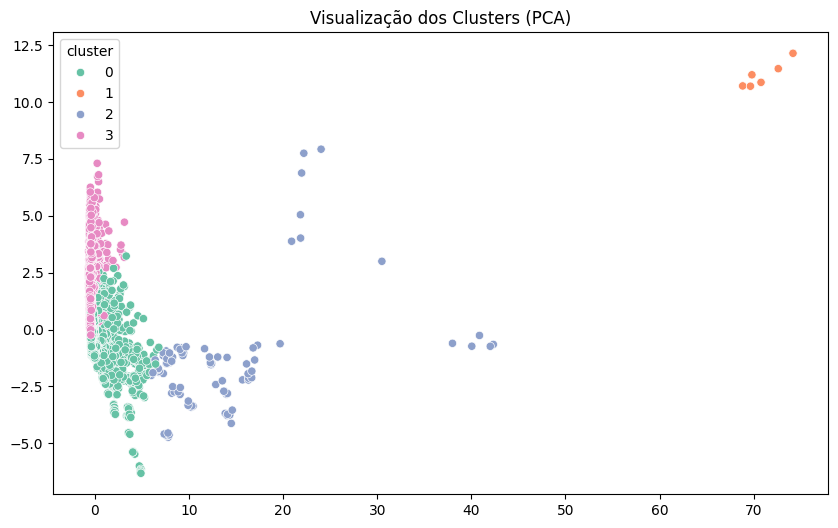

In [16]:
df = pd.read_csv("dataFrame/BrStatsAtualizada.csv", sep=";")
df_kmeans=df.copy()

# Agrupando as colunas
colunas_para_cluster = [
    'Populacao', 'PessoalOcupado', 'PessoalAssalariado', 'PIB',
    'QtEmpresas', 'AreaPlantada_h', 'VlProducaoAgricola',
    'VlProducaoPecuaria', 'Area', 'NrNascimentos', 'NrObitosInfantis',
    'povoamento', 'Exportacoes_R$'
]

# Substitui vírgulas por pontos e converte para float
for col in colunas_para_cluster:
    df_kmeans[col] = df_kmeans[col].astype(str).str.replace(',', '.', regex=False)
    df_kmeans[col] = pd.to_numeric(df_kmeans[col], errors='coerce')
    df_kmeans = df_kmeans.dropna(subset=colunas_para_cluster)

scaler = StandardScaler()
X = scaler.fit_transform(df_kmeans[colunas_para_cluster])

kmeans = KMeans(n_clusters=4, random_state=0)
df_kmeans['cluster'] = kmeans.fit_predict(X)

# Ver o tamanho de cada cluster
#print(df_kmeans['cluster'].value_counts())

# Ver a média de cada variável por cluster
media_por_cluster = df_kmeans.groupby('cluster')[colunas_para_cluster].mean()
#print(media_por_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_kmeans['cluster'], palette='Set2')
plt.title("Visualização dos Clusters (PCA)")
plt.show()

#### Após identificarmos os clusters, aplicamos o Random Forest, um modelo supervisionado, para prever a qual cluster um município pertence, com base nas mesmas variáveis.

#### 🧭 Por que usamos aprendizado supervisionado depois?
#### O objetivo do modelo supervisionado foi avaliar o quanto os grupos estavam bem definidos e quais variáveis mais influenciam na distinção entre os perfis. Assim, o Random Forest serviu para:

#### - Medir a importância de cada variável (ex: PIB, nascimentos, empresas, etc.).

#### - Validar a consistência dos agrupamentos criados com o K-Means.

#### - Aumentar a interpretação dos resultados, tornando os grupos explicáveis.

#### Com base no gráfico de importância das variáveis, identificamos os principais fatores que diferenciam os municípios brasileiros. Esses padrões também foram confirmados nos gráficos de barra com as médias por cluster, e na visualização de dispersão dos grupos, que reforçam como os municípios se organizam em perfis bem distintos.

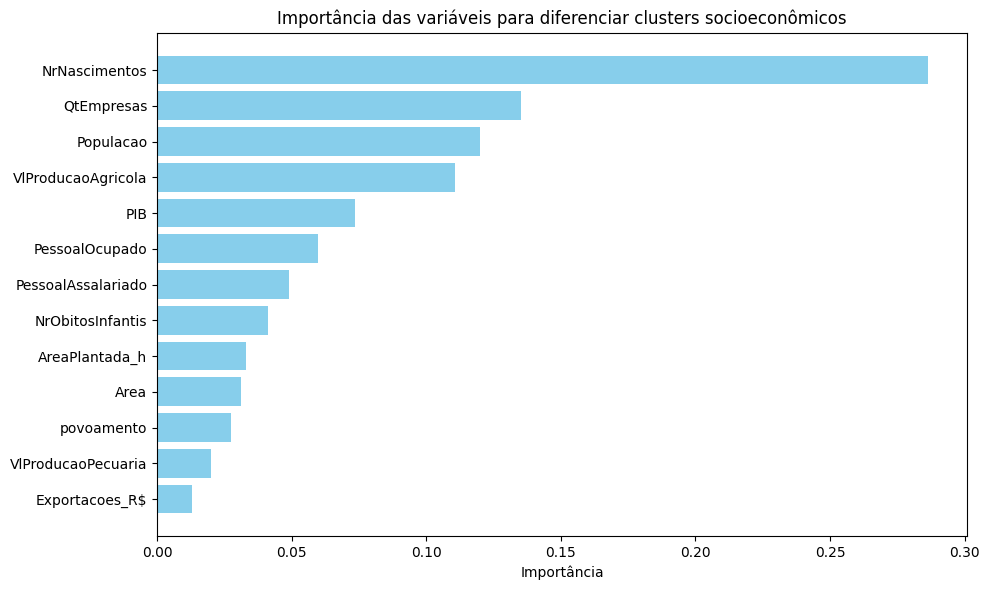

In [19]:
# X já foi definido com StandardScaler
y = df_kmeans['cluster']  # rótulo do cluster (target)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Treinar modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Avaliar desempenho
y_pred = rf.predict(X_test)
#print(classification_report(y_test, y_pred))
importances = rf.feature_importances_
features = colunas_para_cluster

# Organiza em dataframe para visualização
importancia_df = pd.DataFrame({
    'Variável': features,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Visualiza
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variável'], importancia_df['Importância'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Importância das variáveis para diferenciar clusters socioeconômicos')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


#### Unindo aprendizado não supervisionado (K-Means) com supervisionado (Random Forest), conseguimos chegar a seguinte conclusão: 
#### 👶 Demografia e Saúde
- **NrNascimentos** e **NrObitosInfantis** são indicadores fundamentais.
- Regiões com alta natalidade e mortalidade infantil, como o **Nordeste** e partes do **Norte**, tendem a apresentar menor desenvolvimento socioeconômico, refletindo desafios em saúde pública e qualidade de vida.

#### 💼 Atividade Econômica e Emprego
- **QtEmpresas**, **PessoalOcupado** e **PessoalAssalariado** mostram a presença e formalização do mercado de trabalho.
- Áreas como o **Sudeste** e **Sul** apresentam maior concentração dessas variáveis, indicando economias mais diversificadas e formalizadas.

#### 🌾 Produção Agrícola e Pecuária
- **VlProducaoAgricola** e **VlProducaoPecuaria** destacam o peso do agronegócio.
- O **Centro-Oeste** se sobressai como polo agrícola, enquanto o **Sul** mantém forte produção agrícola e pecuária intensiva.

#### 📈 Indicadores Macroeconômicos
- **PIB** e **Exportacoes_R$** refletem a desigualdade econômica.
- Regiões industrializadas como o **Sudeste** apresentam altos valores, contrastando com regiões mais dependentes da exportação de commodities, como o **Norte** e o **Centro-Oeste**.

#### 🌱 Estrutura Fundiária
- **AreaPlantada_h** e **Area** indicam a extensão territorial voltada para produção.
- Regiões de fronteira agrícola, como o **Matopiba**, exibem grande relevância nessas variáveis.

#### Em resumo: 
| Região         | Características Socioeconômicas                                                        |
|----------------|---------------------------------------------------------------------------------------|
| **Nordeste/Norte**  | Alta natalidade e mortalidade infantil, menor presença de empresas formais, desafios sociais e econômicos.      |
| **Sudeste/Sul**     | Elevado PIB, maior emprego formal e economia diversificada e industrializada.                                |
| **Centro-Oeste**    | Forte dependência do agronegócio e das exportações, com grande extensão territorial produtiva.               |